In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys 
sys.path.append('../../src')

In [4]:
# import celloracle as co

In [5]:
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/snrna_human_tonsil.h5ad')
adata

AnnData object with n_obs × n_vars = 5778 × 3333
    obs: 'cell_type', 'author_cell_type', 'cell_type_int', 'banksy_celltypes'
    uns: 'cell_thresholds', 'cell_type_int_colors', 'received_ligands', 'received_ligands_tfl'
    obsm: 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count'

In [63]:
dfko = pd.read_parquet('/Users/koush/Downloads/IL21_KO_11.parquet')

In [377]:
genes = adata.var_names
gene_gene_matrix = np.zeros((len(genes), len(genes))) 
cell_index = 13

gene_mtx = adata.layers['imputed_count'].copy()
simulation_input = gene_mtx.copy()
simulation_input[:, cell_index] = 1
delta_input = simulation_input - gene_mtx
delta_simulated = delta_input.copy()

In [379]:
delta_simulated[cell_index, :].dot(gene_gene_matrix).sum()

0.0

In [ ]:
def perturb_single_cell(gex_delta, cell_index, betas_dict, genes):

    # columns are target genes, rows are regulators
    gene_gene_matrix = np.zeros((len(genes), len(genes))) 

    for i, gene in enumerate(genes):
        _beta_out = betas_dict.get(gene, None)
        
        if _beta_out is not None:
            
            r = np.array(self.beta_dict.data[gene].modulator_gene_indices)
            
            gene_gene_matrix[r, i] = _beta_out.values[cell_index]

    return gex_delta[cell_index, :].dot(gene_gene_matrix)

In [87]:
(dfko-adata.to_df(layer='imputed_count')).mean(1).sum()

-0.022332892077559924

In [28]:
from spaceoracle.plotting.cartography import xy_from_adata
xy = xy_from_adata(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [77]:
import glob

In [80]:
glob.glob('/Volumes/SSD/genome_screens/human_tonsil_1/*IL21*')

['/Volumes/SSD/genome_screens/human_tonsil_1/IL21_4n_0.99x.parquet',
 '/Volumes/SSD/genome_screens/human_tonsil_1/IL21R_4n_1.57x.parquet']

In [81]:
df = pd.read_parquet(
    '/Volumes/SSD/genome_screens/human_tonsil_1/IL21_4n_0.99x.parquet')

In [86]:
(df-adata.to_df(layer='imputed_count')).mean(1).sum()

3.3735192048842073

In [158]:
(dfko-adata.to_df(layer='imputed_count')).mean().sort_values(ascending=False, key=abs).head(10)

Unnamed: 0
IL21       0.000275
FCRL1     -0.000264
PTMA       0.000244
H2AFZ      0.000197
TOP2A      0.000192
BACH2     -0.000192
FCRL2     -0.000190
CENPF      0.000182
ATP5F1E    0.000181
BANK1     -0.000176
dtype: float64

In [161]:
from spaceoracle.plotting.cartography import Cartography

In [160]:
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)

In [169]:
color_dict = {
    'T_CD4': "#f721b7",
    'T_CD8': "#dd3652",
    'T_follicular_helper': "#e28723",
    'B_germinal_center': "#147ee9",
    'plasma': "#61c17c",
    'B_naive': "#308f0e", 
    'B_memory': "#beb637",
    'myeloid': "#c7c6bd",
    'FDC': "#c7c6bd",
    'pDC': "#c7c6bd",
    'T_double_neg': "#c7c6bd",
    'mDC': "#c7c6bd",
    'NK': "#c7c6bd",
}

In [322]:
perturbed_df = pd.read_parquet('/Users/koush/Downloads/IL21_OV_11.parquet')
ovdf = pd.read_parquet(
    '/Volumes/SSD/genome_screens/human_tonsil_1/IL21_4n_0.99x.parquet')

In [333]:
(ovdf-adata.to_df(layer='imputed_count')).iloc[cell_idx][['BCL6', 'ICOS', 'STAT3']].mean()

Unnamed: 0
BCL6     0.000497
ICOS     0.002879
STAT3    0.002449
dtype: float64

In [334]:
(perturbed_df-adata.to_df(layer='imputed_count')).iloc[cell_idx][['BCL6', 'ICOS', 'STAT3']].mean()

Unnamed: 0
BCL6     0.000019
ICOS    -0.000254
STAT3    0.000068
dtype: float64

In [297]:
perturbed_df = perturbed_df.loc[deltadf.index]

In [298]:
adata.obs.cell_type.value_counts()

cell_type
B_germinal_center      1848
B_naive                1067
T_CD4                   779
B_memory                516
T_follicular_helper     294
plasma                  262
FDC                     255
T_CD8                   238
NK                      170
mDC                     137
myeloid                 102
pDC                      64
T_double_neg             46
Name: count, dtype: int64

In [311]:
dfko = pd.read_parquet('/Users/koush/Downloads/IL21_KO_11.parquet')
mask = np.zeros(len(dfko), dtype=bool)
mask[cell_idx] = True
deltadf = dfko.iloc[~mask].loc[np.intersect1d(dfko.iloc[~mask].index, cell_barcodes)]
# deltadf = dfko.loc[np.intersect1d(dfko.index, cell_barcodes)]

In [302]:
ixx = dfko.join(adata.obs.cell_type).query('cell_type.isin(["T_follicular_helper", "T_CD4"])').index

In [347]:
adata.obs.reset_index().query('cell_type == "T_follicular_helper"').index

Index([   8,   26,   37,   39,   60,   72,  150,  166,  169,  173,
       ...
       5616, 5618, 5629, 5645, 5648, 5690, 5696, 5714, 5728, 5754],
      dtype='int64', length=294)

In [340]:
cell_idx

[245, 621, 1032, 2196, 2760, 2923, 3193, 3729, 3966, 4361, 4985]

In [369]:
chart = Cartography(adata[cell_idx+list(adata.obs.reset_index().query(
    'cell_type.isin(["T_follicular_helper", "T_CD4"])').index)], color_dict)

In [370]:
perturbed_df.loc[list(adata.obs.query(
    'cell_type == "T_follicular_helper"').index)] = adata.to_df(layer='imputed_count').loc[list(adata.obs.query(
    'cell_type == "T_follicular_helper"').index)]

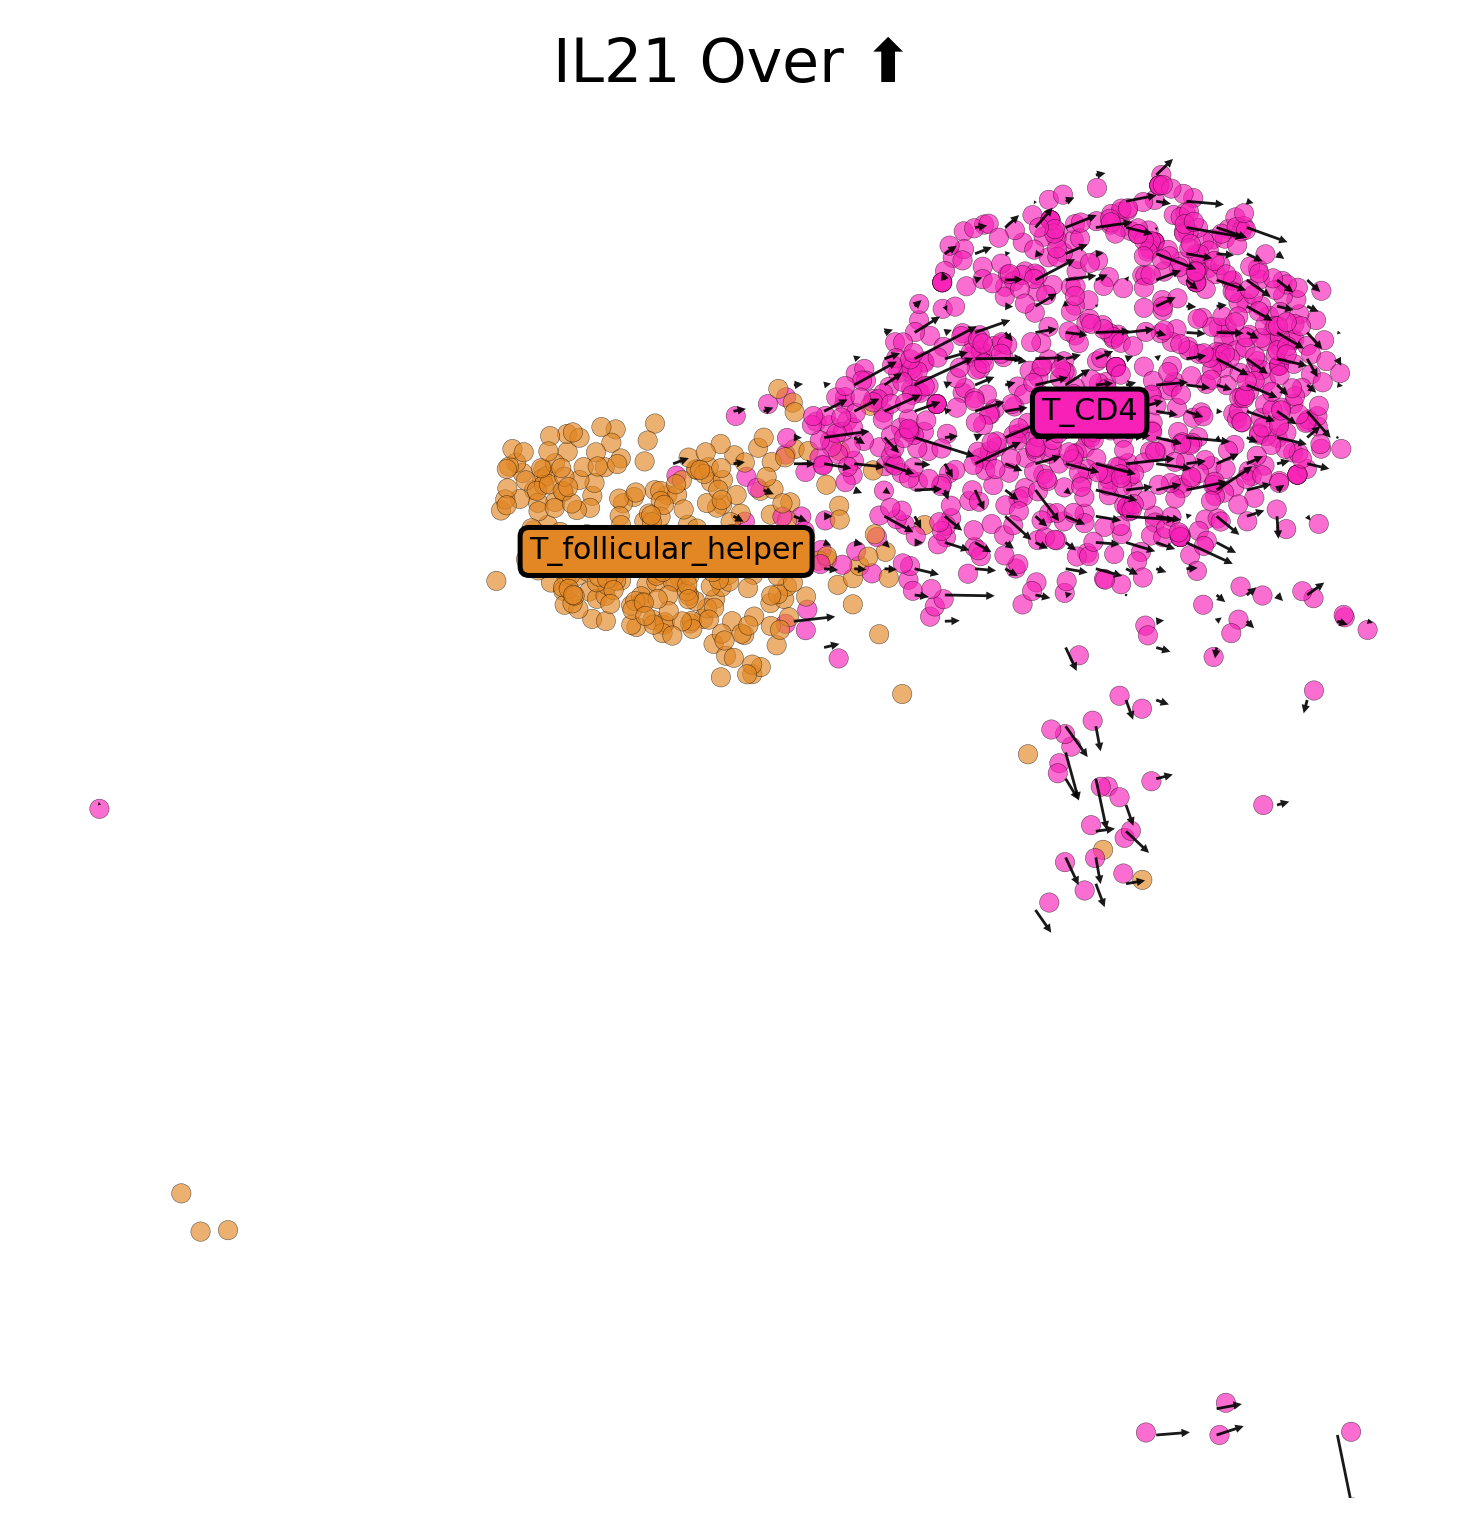

In [374]:
kotarget = 'IL21'
mode = 'Over ⬆'
# mode = 'KO ⬇'
suffix = '_1' if mode == 'Over ⬆' else ''
betadata_path='/Volumes/SSD/genome_screens/human_tonsil'+suffix

grid, vec = chart.plot_umap_quiver(
    perturb_target=kotarget,
    grid_scale=1,
    vector_scale=0.5,
    n_neighbors=100,
    figsize=(5, 5), 
    hue='cell_type',
    alpha=0.65,
    perturbed_df=perturbed_df,
    # betadata_path=betadata_path,
    scatter_size=15,
    remove_null=True,
    legend_on_loc=True,
    legend_fontsize=6
)
plt.title(f'{kotarget} {mode}')
plt.show()

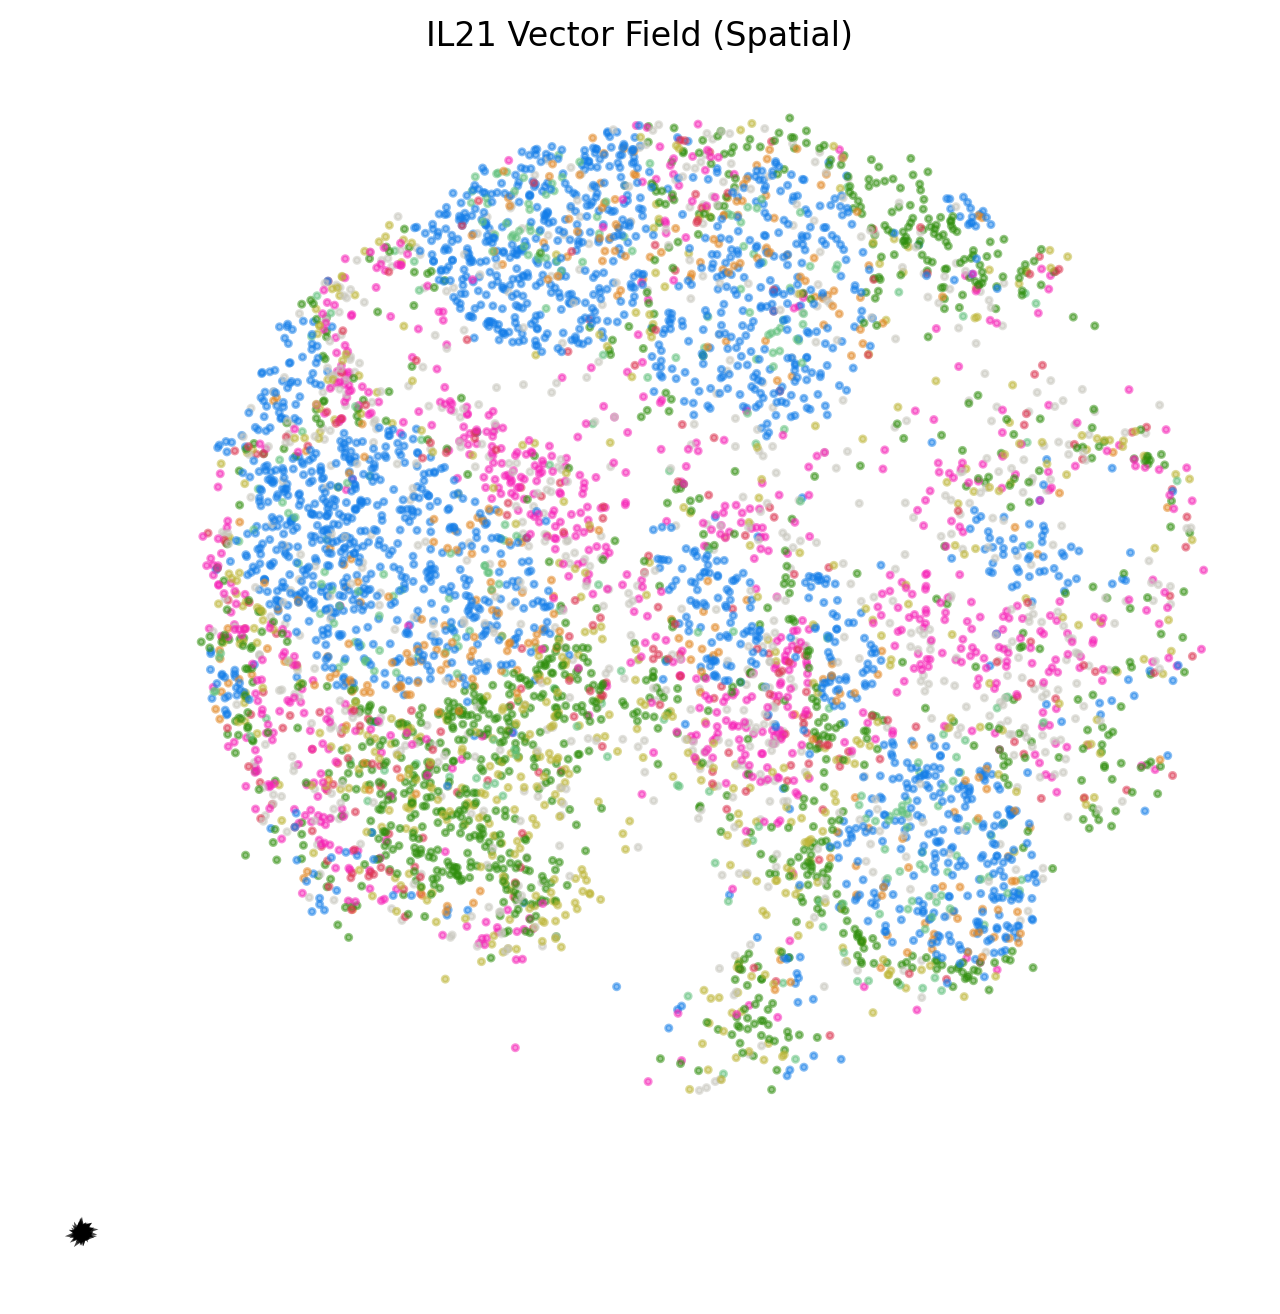

In [ ]:
# Plot the vector field using quiver
plt.figure(figsize=(8, 8))
plt.quiver(grid[:, 0], grid[:, 1], vec[:, 0], vec[:, 1], 
           scale=30, width=0.002, color='black', alpha=0.7)
plt.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], 
            c=adata.obs['cell_type'].map(chart.color_dict), 
            s=5, alpha=0.5)
plt.axis('off')
plt.title(f'{kotarget} Vector Field')
plt.show()

In [154]:
(dfko-adata.to_df(layer='imputed_count'))[['BCL6']].join(
    adata.obs.cell_type).query('cell_type=="T_CD4"').sort_values(
        by='BCL6', ascending=False, key=abs)

,BCL6,cell_type
IL21_4n_0.17x,,
GGGTTATCATCGGATT-1,-6.682736e-05,T_CD4
GTAGGAGCAAGCAATA-1,-6.266559e-05,T_CD4
TTTACTGTCCGTACGG-1,-5.712601e-05,T_CD4
AACAAGATCGACACCG-1,-5.289755e-05,T_CD4
AGAGAGCCAAGTCCAT-1,-5.145650e-05,T_CD4
...,...,...
TTGTTTGCAGAATCGG-1,-1.924009e-06,T_CD4
CTGCAGGTCATTACTC-1,-1.486755e-06,T_CD4
GACTCTCCACACCTAA-1,-1.329437e-06,T_CD4


In [97]:
import squidpy as sq

In [135]:
sq.gr.spatial_neighbors(adata, radius=100, coord_type='generic')

In [213]:
cell_idx = [245,  621, 1032, 2196, 2760, 2923, 3193, 3729, 3966, 4361, 4985]

In [204]:
neighbors = []
for i in cell_idx:
    neighbors.append(adata.to_df(layer='imputed_count').iloc[ 
        adata.obsp['spatial_connectivities'][i].toarray()[0] == 1].index)

In [210]:
cell_barcodes = np.unique(np.concatenate(neighbors))

In [246]:
dfko = pd.read_parquet('/Users/koush/Downloads/IL21_KO_11.parquet')
mask = np.zeros(len(dfko), dtype=bool)
mask[cell_idx] = True
# deltadf = dfko.iloc[~mask].loc[np.intersect1d(dfko.iloc[~mask].index, cell_barcodes)]
deltadf = dfko.loc[np.intersect1d(dfko.index, cell_barcodes)]

In [227]:
(deltadf - adata.to_df(layer='imputed_count').loc[deltadf.index])[['BCL6']]

Unnamed: 0,BCL6
IL21_4n_0.17x,
AACAACCGTCTACATG-1,-0.000019
AACGGGAGTGCCGTTG-1,-0.000213
AAGATAGAGAAGTCAT-1,-0.000003
AAGGTAAAGTGAATAC-1,-0.000002
AAGTACCCAACTCCCT-1,-0.000020
...,...
TTCAGGACAATAACGA-1,-0.000012
TTCCGGTTCTGTTCAT-1,-0.000037
TTCTAGTGTCGCTTGG-1,-0.000007


<Axes: xlabel='x', ylabel='y'>

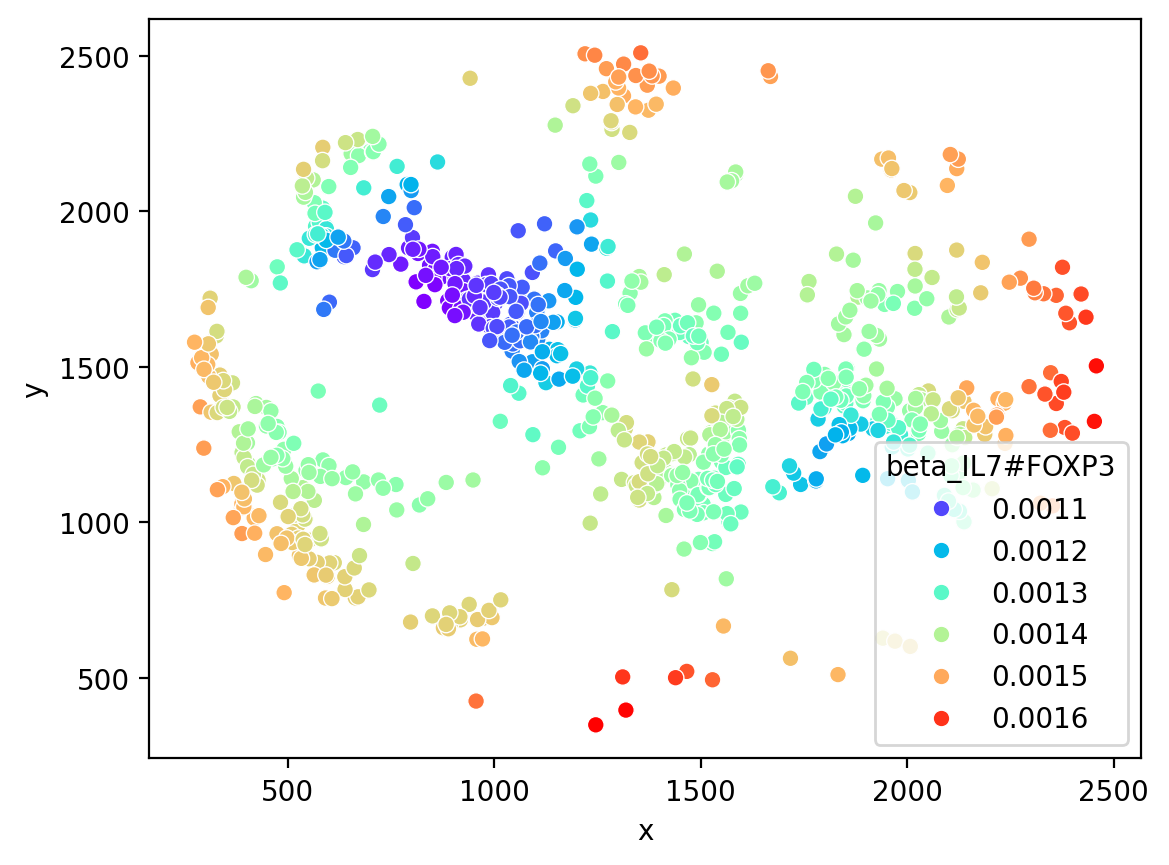

In [41]:
sns.scatterplot(data=df.join(adata.obs.cell_type).join(xy).query(
    'cell_type.isin(["T_CD4"])'), 
    x='x', y='y', hue='beta_IL7#FOXP3', alpha=1, palette='rainbow')

In [6]:
sc.pp.pca(adata, n_comps=100)
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
adata = adata[adata.obs.cell_type.isin(
    [
        'B_germinal_center', 'B_naive', 'T_CD4', 
        'B_memory', 'T_follicular_helper', 
        'plasma', 'FDC', 'T_CD8'
])]

In [11]:
from spaceoracle.prophets import Prophet
from spaceoracle.plotting.cartography import xy_from_adata
from spaceoracle.plotting.cartography import Cartography
from spaceoracle.gene_factory import GeneFactory

In [12]:
xy = xy_from_adata(adata)
adata.obs.cell_type.value_counts()

cell_type
B_germinal_center      1848
B_naive                1067
T_CD4                   779
B_memory                516
T_follicular_helper     294
plasma                  262
FDC                     255
T_CD8                   238
Name: count, dtype: int64

In [13]:
gf = GeneFactory.from_json(
    adata, 
    '/Volumes/SSD/lasso_runs/human_tonsil/run_params.json', 
    override_params={
        'save_dir': '/Volumes/SSD/lasso_runs/human_tonsil'
    }
)
assert len(gf.queue.remaining_genes) == 0

In [14]:
gf.load_betas(subsample=None, float16=True, obs_names=gf.adata.obs_names)

In [15]:
target_gene = 'IL21'
target_ct = 'T_CD4'
target_cells = gf.adata.obs[['cell_type']].reset_index(drop=True).query('cell_type == @target_ct').index.values
target_ct, target_gene, gf.adata.to_df(layer='imputed_count').join(gf.adata.obs.cell_type).groupby(
    'cell_type').max()[[target_gene]].loc[target_ct].values[0], len(target_cells)

('T_CD4', 'IL21', 0.17430227404273224, 779)

In [19]:
gex_out = gf.perturb(
    target=target_gene, 
    n_propagation=4, 
    gene_expr=0.174302, 
    cells=target_cells, 
)

: 

In [104]:
gf.queue.completed_genes

['HBEGF', 'PLXNA2', 'KLRK1']

In [114]:
from spaceoracle.oracles import OracleQueue


screen_queue = OracleQueue(
            model_dir='/tmp/test', 
            all_genes=[],
            priority_genes=None,
            lock_timeout=3600
        )

In [116]:
screen_queue.completed_genes

['HBEGF', 'ALCAM', 'PLXNA2', 'KLRK1', 'TNFSF13B']

In [109]:
gf.genome_screen(
    save_to='/tmp/test',
    n_propagation=2,
    mode='overexpress'
)

KeyboardInterrupt: 

In [10]:
from spaceoracle.beta import Betabase

bdb = Betabase(
    gf.adata, 
    gf.save_dir, 
    subsample=None, 
    float16=True, 
    obs_names=adata.obs_names,
    auto_load=False
)


In [11]:
interactions = {}

for i in ['B_germinal_center', 'T_CD4', 'B_naive', 'T_follicular_helper', 'T_CD8']:
    interactions[i] = bdb.collect_interactions(cell_type=i)

In [22]:
df = gf.splash_betas(gene='GATA3')

In [67]:
interactions['T_CD4'].sort_values(by='beta', ascending=False, key=abs).query(
    'interaction_type == "ligand-receptor" and gene == "ICOS"').head(10)

,interaction,gene,beta,interaction_type
T_CD4,,,,
216361,beta_IL16$CD4,ICOS,2.846973,ligand-receptor
292768,beta_ANGPT2$ITGB1,ICOS,1.629779,ligand-receptor
273378,beta_ANGPTL1$ITGB1,ICOS,1.509129,ligand-receptor
358064,beta_LGALS9$PTPRC,ICOS,1.358381,ligand-receptor
150320,beta_IL7$IL7R,ICOS,1.143524,ligand-receptor
270783,beta_ANGPTL1$ITGA1,ICOS,-0.958697,ligand-receptor
488733,beta_CD22$PTPRC,ICOS,0.862803,ligand-receptor
1052,beta_TGFB1$TGFBR1,ICOS,0.790196,ligand-receptor
177970,beta_EBI3$IL6ST,ICOS,0.725679,ligand-receptor


In [66]:
interactions['T_CD4'].sort_values(by='beta', ascending=False, key=abs).query(
    'interaction_type == "ligand-tf" and gene == "FOXP3"').head(10)

,interaction,gene,beta,interaction_type
T_CD4,,,,
57901,beta_TGFB1#GATA3,FOXP3,-0.009603,ligand-tf
8340,beta_IL7#KLF3,FOXP3,-0.007403,ligand-tf
46253,beta_PDGFC#HIVEP3,FOXP3,0.007275,ligand-tf
45216,beta_PDGFD#EGR3,FOXP3,0.005616,ligand-tf
13160,beta_TGFB1#NR3C2,FOXP3,-0.003904,ligand-tf
18887,beta_VEGFA#RORA,FOXP3,-0.002861,ligand-tf
11494,beta_NRG1#NR3C2,FOXP3,-0.002800,ligand-tf
2278,beta_IL15#EBF1,FOXP3,-0.002218,ligand-tf
74929,beta_TGFB1#FOXS1,FOXP3,0.002093,ligand-tf


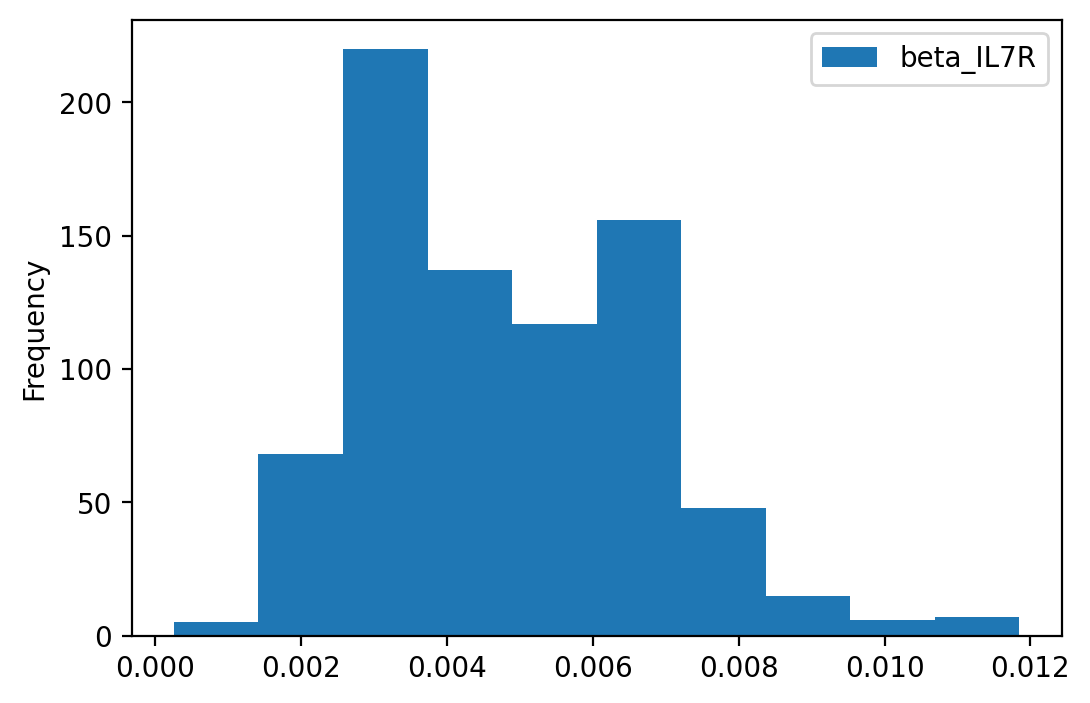

In [50]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100
df.join(gf.adata.obs.cell_type).query('cell_type == "T_CD4"')[['beta_IL7R']].plot.hist()
plt.show()

In [62]:
(pd.read_parquet('/Volumes/SSD/genome_screens/human_tonsil/IL7_4n_0x.parquet')-adata.layers[
    'imputed_count']).join(
    adata.obs.cell_type
).groupby('cell_type').mean().mean(1).sort_values(ascending=False, key=abs)

cell_type
T_CD4                 -0.000849
FDC                   -0.000478
NK                    -0.000377
T_follicular_helper   -0.000292
B_memory              -0.000256
mDC                   -0.000203
myeloid               -0.000202
B_germinal_center     -0.000192
T_CD8                 -0.000158
pDC                   -0.000101
plasma                -0.000087
T_double_neg          -0.000081
B_naive                0.000019
dtype: float64

In [61]:
(pd.read_parquet('/Volumes/SSD/genome_screens/human_tonsil/IL7R_4n_0x.parquet')-adata.layers[
    'imputed_count']).join(
    adata.obs.cell_type
).groupby('cell_type').mean().mean(1).sort_values(ascending=False, key=abs)

cell_type
T_CD4                 -0.001154
NK                    -0.000544
T_CD8                 -0.000309
mDC                   -0.000305
myeloid               -0.000223
FDC                   -0.000175
T_follicular_helper   -0.000134
T_double_neg          -0.000105
pDC                   -0.000094
plasma                -0.000014
B_naive               -0.000011
B_memory              -0.000011
B_germinal_center     -0.000005
dtype: float64

In [46]:
df.join(gf.adata.obs.cell_type).query('cell_type == "T_CD4"').drop(
    columns=['cell_type']).mean().sort_values(
    ascending=False, key=abs).head(10)

beta_ZNF219    -0.986513
beta_TEAD2     -0.903023
beta_IL7        0.748095
beta_LGALS9     0.560340
beta_EGR1      -0.491040
beta_RFX8       0.457854
beta_FOXP3      0.379840
beta_ANGPTL1    0.357991
beta_BCL6       0.327434
beta_ANGPT2     0.256969
dtype: float64

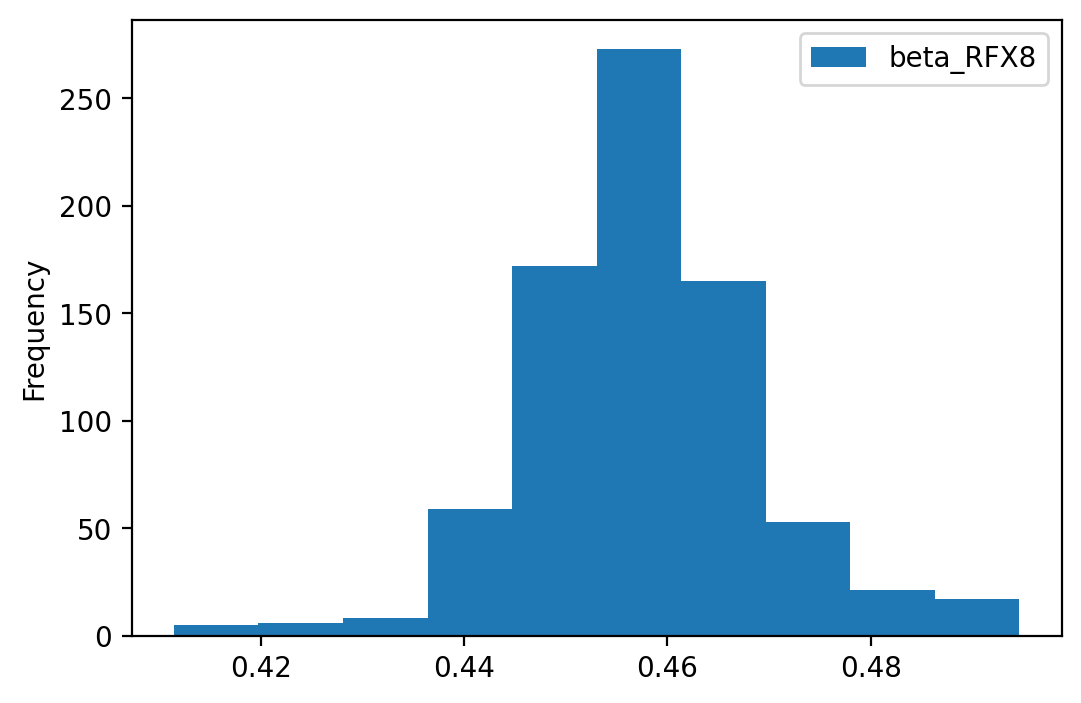

In [40]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100
df.join(gf.adata.obs.cell_type).query('cell_type == "T_CD4"')[['beta_RFX8']].plot.hist()
plt.show()